## Load Stuff

In [1]:
import torch
from mario_gpt import MarioDataset, MarioLM, TrainingConfig, MarioGPTTrainer
from mario_gpt.utils import view_level, convert_level_to_png, join_list_of_list, characterize

In [2]:
BASE = "distilgpt2"

In [3]:
from transformers import AutoConfig, AutoModelWithLMHead

In [4]:
mario_lm = MarioLM(lm_path=BASE, tokenizer_path=BASE)

Using distilgpt2 lm


/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1362: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at distilgpt2 and are newly initialized: ['transformer.h.5.ln_cross_attn.bias', 'transformer.h.1.crossattention.q_attn.bias', 'transformer.h.5.crossattention.c_attn.bias', 'transformer.h.5.crossattention.c_attn.weight', 'transformer.h.3.crossattention.c_proj.weight', 'transformer.h.0.crossattention.c_attn.weight', 'transformer.h.0.crossattention.q_attn.bias', 'transformer.h.0.crossattention.q_attn.weight', 'transformer.h.1.crossattention.c_attn.weight', 'transformer.h.2.crossattention.c_proj.weight', 'transformer.h

Using distilgpt2 tokenizer


### Load Dataset (Optional)

In [5]:
dataset = MarioDataset(mario_lm.tokenizer)

No level string specified, using default string FULL_LEVEL_STR_WITH_PATHS...





Token indices sequence length is longer than the specified maximum sequence length for this model (102116 > 1024). Running this sequence through the model will result in indexing errors


In [6]:
view_level(dataset.input_ids[:700], dataset.tokenizer)

['--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '--------------------------------------------------',
 '-------------------------------------------------o',
 '--------XSSSSS---------------------------------SSS',
 '--------X-----------------------------------------',
 '--------X-----------------------------------------',
 '-------EX--E-X---------------xxxx-?-----------xxxx',
 '--------XSS?SX---QQ?QQ------xx<>-x-----------xx--?',
 '---------------------------xx-[]--x---------xx----',
 '--------------------------xx--[]---x-------xx-----',
 'xxxxxxxxxxxxxxxxxxxxxxxxxxx---[]----xxxxxxxx------',
 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---XXX']

/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/Pillow-9.1.1-py3.9-linux-x86_64.egg/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


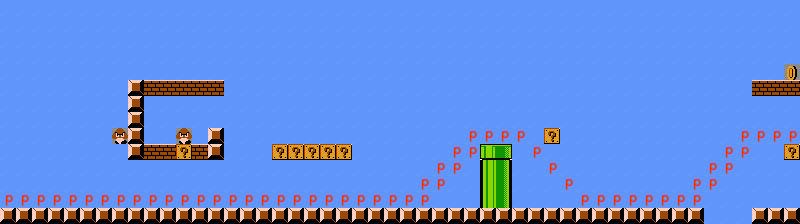

In [7]:
img = convert_level_to_png(dataset.input_ids[:700],  dataset.tokenizer)[0]
img

### Setup training

In [8]:
config = TrainingConfig(save_iteration=10)

In [9]:
trainer = MarioGPTTrainer(mario_lm, dataset, config=config)

/home/kokkgoblin/miniconda3/envs/py39/lib/python3.9/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [11]:
trainer.train(100, batch_size=1)

Training for 100 Iterations and batch_size 1
================== Training Config ==================
gradient_accumulation_steps -- 1
mixed_precision -- no
output_dir -- Mario-GPT2-700-context-length
learning_rate -- 0.0005
epsilon -- 1e-09
lr_warmup_steps -- 1000
batch_size -- 4
total_steps -- 50000
mask_proportion -- 0.0
eval_iteration -- 1000
save_iteration -- 10
================== MarioLM ==================
Follow tensorboard with: python -m tensorboard.main --logdir /home/kokkgoblin/Code/mario-gpt/notebooks/Mario-GPT2-700-context-length


{'loss': 0.6079789400100708, 'last_lr': 5.5e-05}: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.42it/s]
